In [1]:
import numpy as np 
import pandas as pd
import os
import glob
import re
import sys

import plotnine
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
import geopandas as gpd

In [2]:
files = glob.glob('dataset/*.csv')
data = []
for i in files :
    i = re.sub("dataset/", "", i)
    data.append(re.sub(".csv","",i))
for i in range(len(files)) :
    globals()[data[i]] = pd.read_csv(files[i])
data

['TimeAge',
 'SearchTrend',
 'TimeProvince',
 'Weather',
 'PatientRoute',
 'PatientInfo',
 'Region',
 'TimeGender',
 'Case',
 'Time']

In [127]:
korea = gpd.read_file("CTPRVN_201905")

데이터는 http://www.gisdeveloper.co.kr/?p=2332 에서 시도별로 나뉜 지도 19년 5월 업데이트분을 가져왔음을 참고.

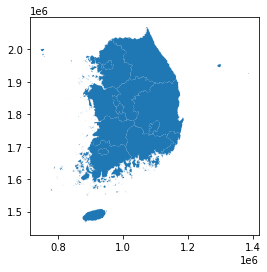

In [7]:
korea.plot()

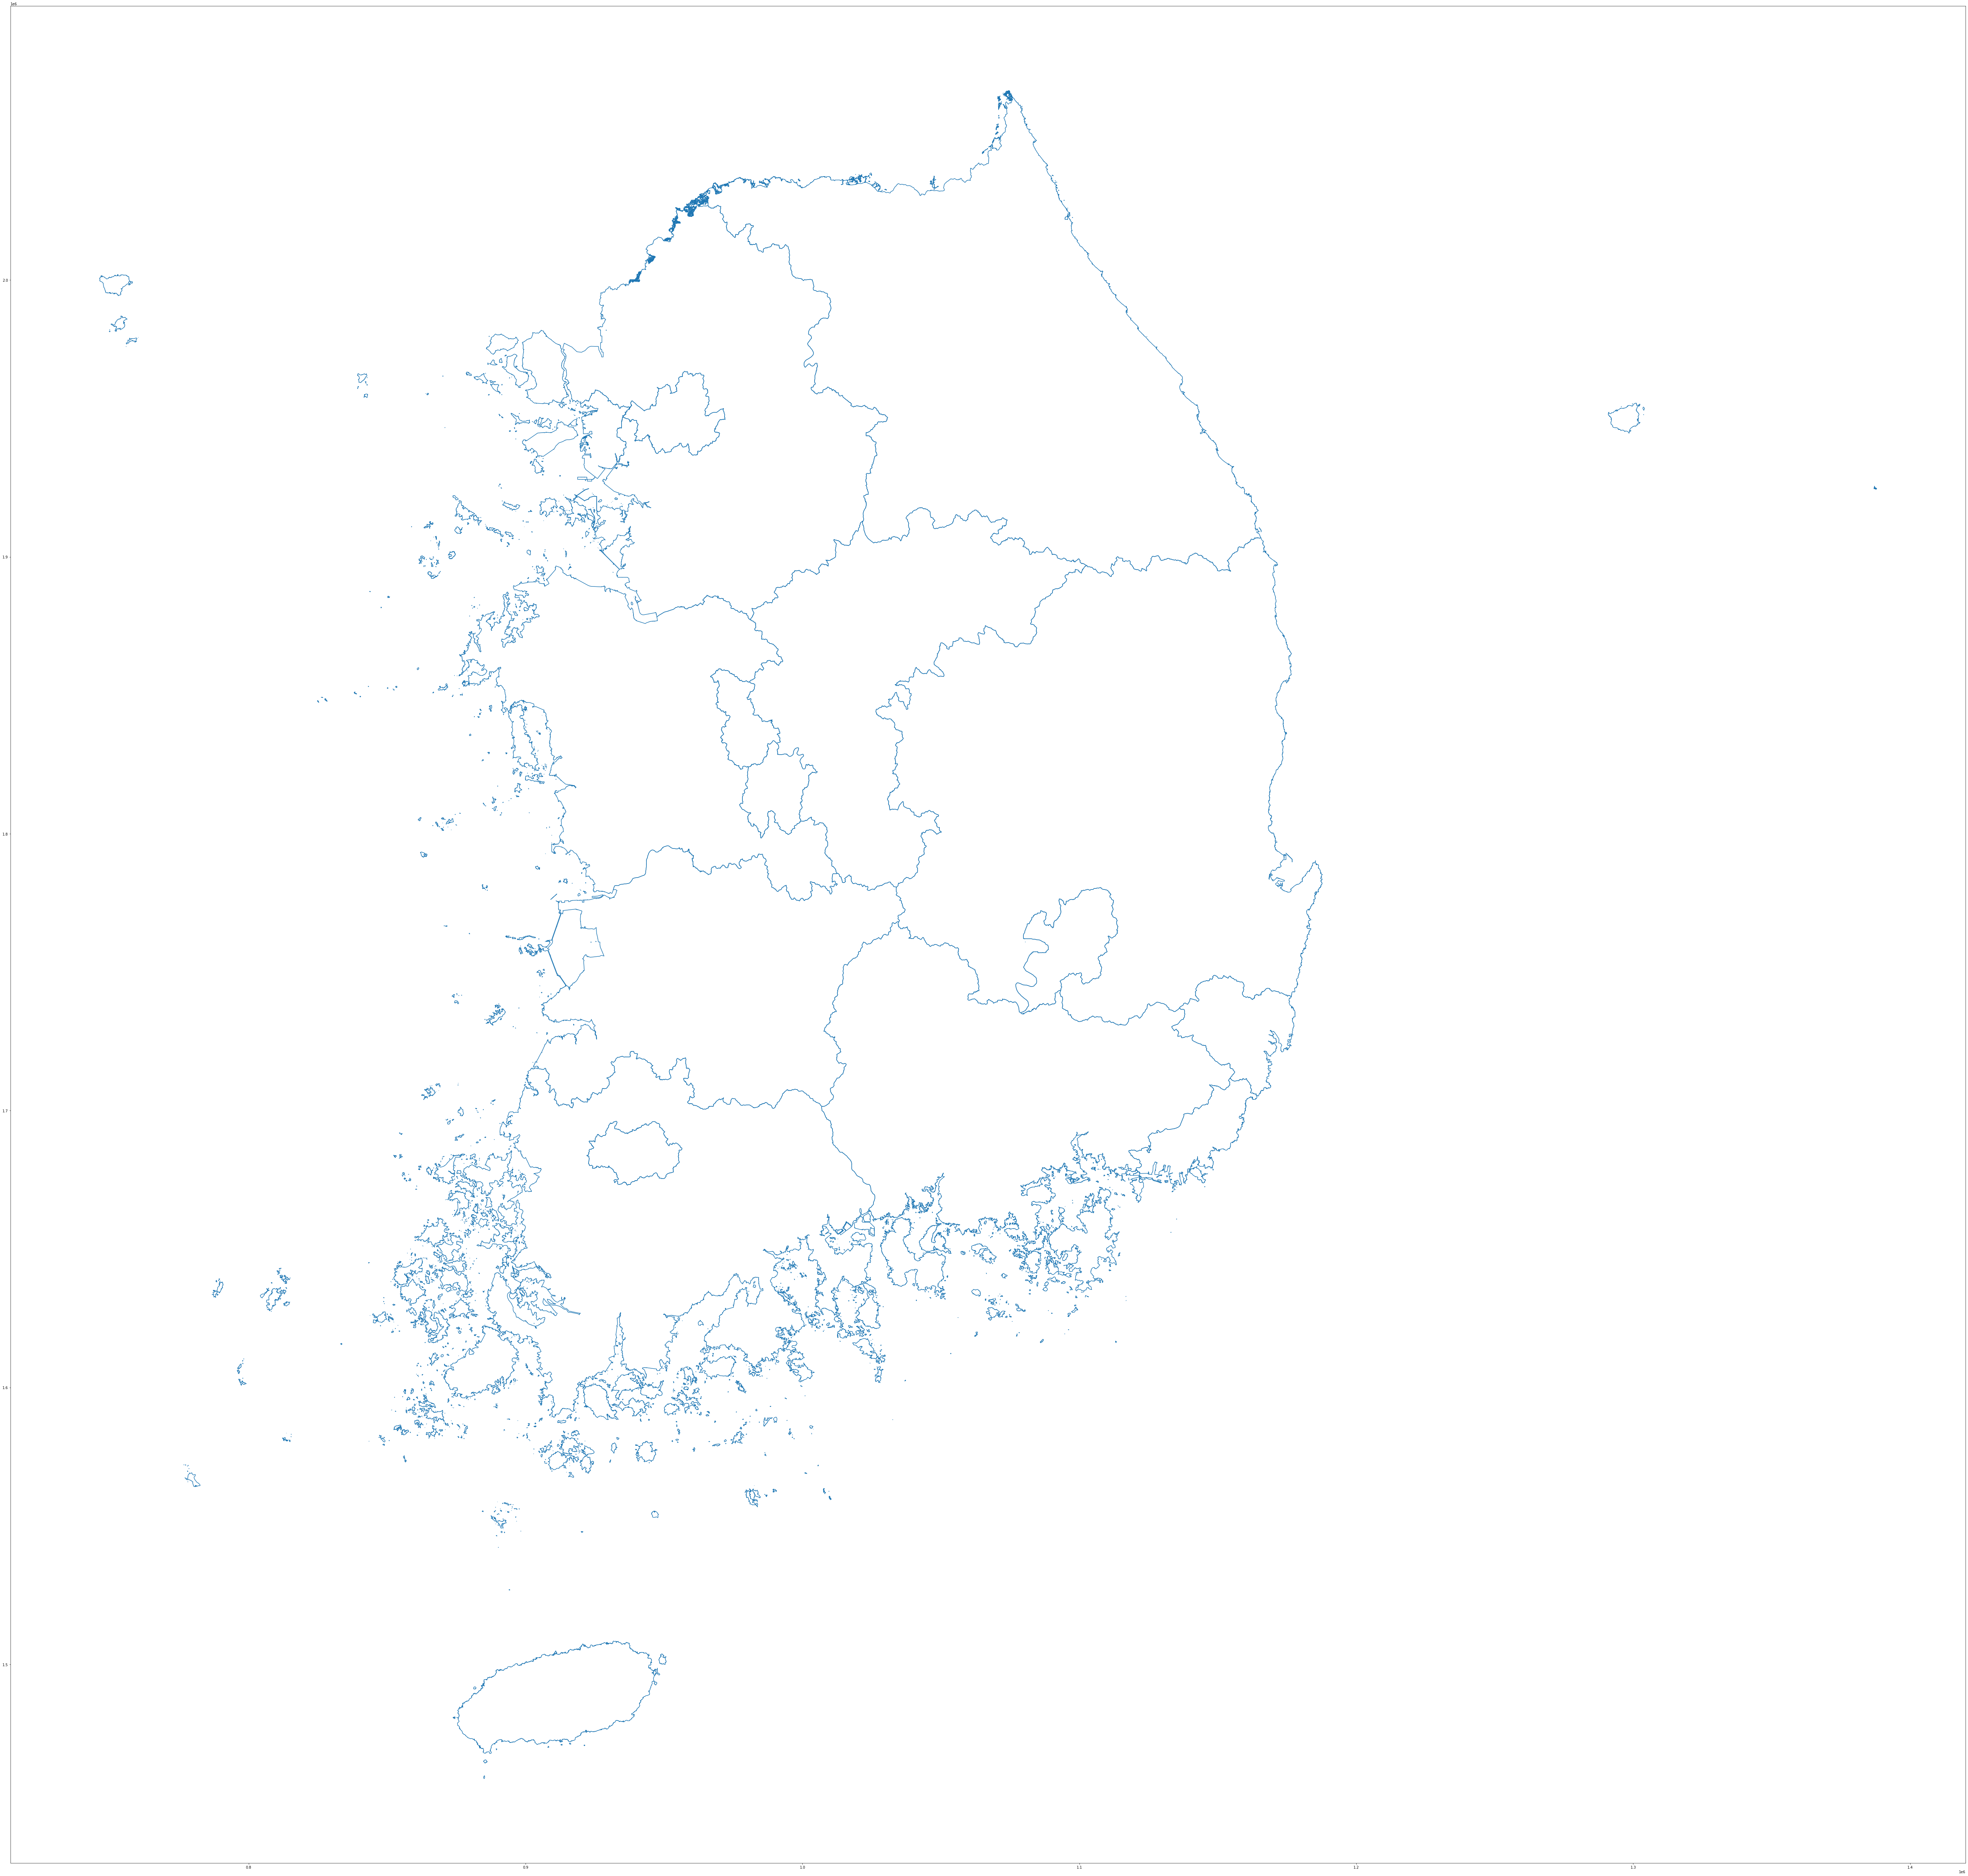

In [9]:
korea.boundary.plot(figsize=(100,100))

In [5]:
korea.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,¼­¿ïÆ¯º°½Ã,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,ºÎ»ê±¤¿ª½Ã,"MULTIPOLYGON (((1138209.365 1673609.179, 11381..."
2,27,Daegu,´ë±¸±¤¿ª½Ã,"POLYGON ((1107777.593 1780522.269, 1107845.409..."
3,28,Incheon,ÀÎÃµ±¤¿ª½Ã,"MULTIPOLYGON (((909743.413 1946023.117, 909736..."
4,29,Gwangju,±¤ÁÖ±¤¿ª½Ã,"POLYGON ((932712.687 1696168.692, 932781.680 1..."


1. Korean name 이 깨져보이지만 어차피 영어 이름이 병기되어있어서 상관 없을 듯 하다.
2. shp 파일은 utm-k 로 이루어져 있으므로, utm -> latlong 으로 변환하는 방법을 찾아야 한다.

### UTM to Latitude&Longitude Trials

In [36]:
korea.geometry

0     POLYGON ((966987.226 1941110.946, 966987.119 1...
1     MULTIPOLYGON (((1138209.365 1673609.179, 11381...
2     POLYGON ((1107777.593 1780522.269, 1107845.409...
3     MULTIPOLYGON (((909743.413 1946023.117, 909736...
4     POLYGON ((932712.687 1696168.692, 932781.680 1...
5     POLYGON ((990946.725 1832389.260, 991057.692 1...
6     MULTIPOLYGON (((1167949.952 1710285.043, 11679...
7     POLYGON ((971235.936 1844386.985, 971234.055 1...
8     MULTIPOLYGON (((931607.470 1894480.382, 931653...
9     MULTIPOLYGON (((1163759.191 1909653.101, 11637...
10    POLYGON ((1042689.435 1917662.690, 1042731.339...
11    MULTIPOLYGON (((919207.926 1777520.288, 919117...
12    MULTIPOLYGON (((902676.539 1717491.597, 902679...
13    MULTIPOLYGON (((934759.097 1614071.335, 934759...
14    MULTIPOLYGON (((1171290.353 1782200.848, 11712...
15    MULTIPOLYGON (((1053643.218 1612344.022, 10536...
16    MULTIPOLYGON (((885004.560 1458756.461, 884996...
Name: geometry, dtype: geometry

Geometric Polygon -> points -> 2 columns (X,Y) -> convert to lat&lon -> Geometric Polygon

https://gis.stackexchange.com/questions/261994/converting-coordinates-of-a-bunch-of-polygons-in-a-shapefile-which-are-in-utm-to 의 방법을 시도.

In [81]:
#import some additional libraries:  
from pyproj import Proj, transform
import shapely.geometry as geom
import shapely.wkt

init 은 epsg:5179 이다. https://datascienceschool.net/view-notebook/ef921dc25e01437b9b5c532ba3b89b02/ 에서 GeoPandas 의 좌표계 부분 참고.

In [44]:
#create your in and out projections with pyroj:
inProj = Proj({'init': 'epsg:5179'}) 
outProj = Proj({'init': 'epsg:4326'})

/Users/seonwoolim/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/seonwoolim/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [107]:
korea

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,¼­¿ïÆ¯º°½Ã,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,ºÎ»ê±¤¿ª½Ã,"MULTIPOLYGON (((1138209.365 1673609.179, 11381..."
2,27,Daegu,´ë±¸±¤¿ª½Ã,"POLYGON ((1107777.593 1780522.269, 1107845.409..."
3,28,Incheon,ÀÎÃµ±¤¿ª½Ã,"MULTIPOLYGON (((909743.413 1946023.117, 909736..."
4,29,Gwangju,±¤ÁÖ±¤¿ª½Ã,"POLYGON ((932712.687 1696168.692, 932781.680 1..."
5,30,Daejeon,´ëÀü±¤¿ª½Ã,"POLYGON ((990946.725 1832389.260, 991057.692 1..."
6,31,Ulsan,¿ï»ê±¤¿ª½Ã,"MULTIPOLYGON (((1167949.952 1710285.043, 11679..."
7,36,Sejong-si,¼¼Á¾Æ¯º°ÀÚÄ¡½Ã,"POLYGON ((971235.936 1844386.985, 971234.055 1..."
8,41,Gyeonggi-do,°æ±âµµ,"MULTIPOLYGON (((931607.470 1894480.382, 931653..."
9,42,Gangwon-do,°­¿øµµ,"MULTIPOLYGON (((1163759.191 1909653.101, 11637..."


In [128]:
for i in range(len(korea.geometry)) :
    region = korea.geometry[i]
    if region.type == "Polygon" :
        coords_obj = list(region.exterior.coords)
        empty_list = []
        for j in range(len(coords_obj)) :
            x,y = transform(inProj,outProj,coords_obj[j][0],coords_obj[j][1])
            empty_list.append(geom.Point(x,y))
        result = geom.Polygon([[p.x,p.y] for p in empty_list])
    elif region.type == "MultiPolygon" :
        pols = list(region)
        for j in range(len(pols)) :
            coords_obj = list(pols[j].exterior.coords)
            empty_list = []            
            for k in range(len(coords_obj)):
                x,y = transform(inProj,outProj,coords_obj[k][0],coords_obj[k][1])
                empty_list.append(geom.Point(x,y))
            empty_list = geom.Polygon([p.x,p.y] for p in empty_list)
            pols[j] = empty_list
        result = geom.MultiPolygon(pols)
    korea.geometry[i] = result
    print(i+1)
print("Done")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Done


In [132]:
korea.to_file("korea.shp",driver="ESRI Shapefile")

## PatientRoute

In [6]:
PatientRoute.head()

,patient_id,global_num,date,province,city,latitude,longitude
0,1400000001,1,2020-01-19,Incheon,Jung-gu,37.460459,126.440680
1,1400000001,1,2020-01-20,Incheon,Seo-gu,37.478832,126.668558
2,1000000001,2,2020-01-22,Gyeonggi-do,Gimpo-si,37.562143,126.801884
3,1000000001,2,2020-01-23,Seoul,Jung-gu,37.567454,127.005627
4,2000000001,3,2020-01-20,Incheon,Jung-gu,37.460459,126.440680


In [15]:
len(PatientRoute.groupby('patient_id').count())

31

이동경로 데이터는 31명 데이터밖에 없다

In [17]:
PatientRoute.groupby('patient_id').count()

,global_num,date,province,city,latitude,longitude
patient_id,,,,,,
1000000001,2,2,2,2,2,2
1000000002,9,9,9,9,9,9
1000000003,3,3,3,3,3,3
1000000004,2,2,2,2,2,2
1000000005,1,1,1,1,1,1
1000000006,2,2,2,2,2,2
1000000007,2,2,2,2,2,2
1000000008,1,1,1,1,1,1
1000000009,10,10,10,10,10,10


제일 많이 싸돌아다닌 애를 골라서 맵 위에 얹어보자. patient id 1000000013 이다.

In [133]:
inssa = PatientRoute[PatientRoute["patient_id"]==1000000013]

In [155]:
inssa

,patient_id,global_num,date,province,city,latitude,longitude,geometry
127,1000000013,29,2020-02-04,Seoul,Jung-gu,37.573067,127.015951,POINT (127.01595 37.57307)
128,1000000013,29,2020-02-04,Seoul,Dongdaemun-gu,37.575981,127.024678,POINT (127.02468 37.57598)
129,1000000013,29,2020-02-04,Seoul,Dongdaemun-gu,37.575981,127.024678,POINT (127.02468 37.57598)
130,1000000013,29,2020-02-04,Seoul,Jongno-gu,37.573067,127.015951,POINT (127.01595 37.57307)
131,1000000013,29,2020-02-05,Seoul,Jongno-gu,37.571721,127.010896,POINT (127.01090 37.57172)
132,1000000013,29,2020-02-05,Gyeonggi-do,Uijeongbu-si,37.759448,127.042167,POINT (127.04217 37.75945)
133,1000000013,29,2020-02-05,Gyeonggi-do,Uijeongbu-si,37.759448,127.042167,POINT (127.04217 37.75945)
134,1000000013,29,2020-02-05,Seoul,Jongno-gu,37.571721,127.010896,POINT (127.01090 37.57172)
135,1000000013,29,2020-02-05,Seoul,Jongno-gu,37.575739,127.015399,POINT (127.01540 37.57574)
136,1000000013,29,2020-02-05,Seoul,Jongno-gu,37.572390,127.013899,POINT (127.01390 37.57239)


In [134]:
inssa_geo = gpd.GeoDataFrame(inssa,geometry=gpd.points_from_xy(inssa.longitude,inssa.latitude))

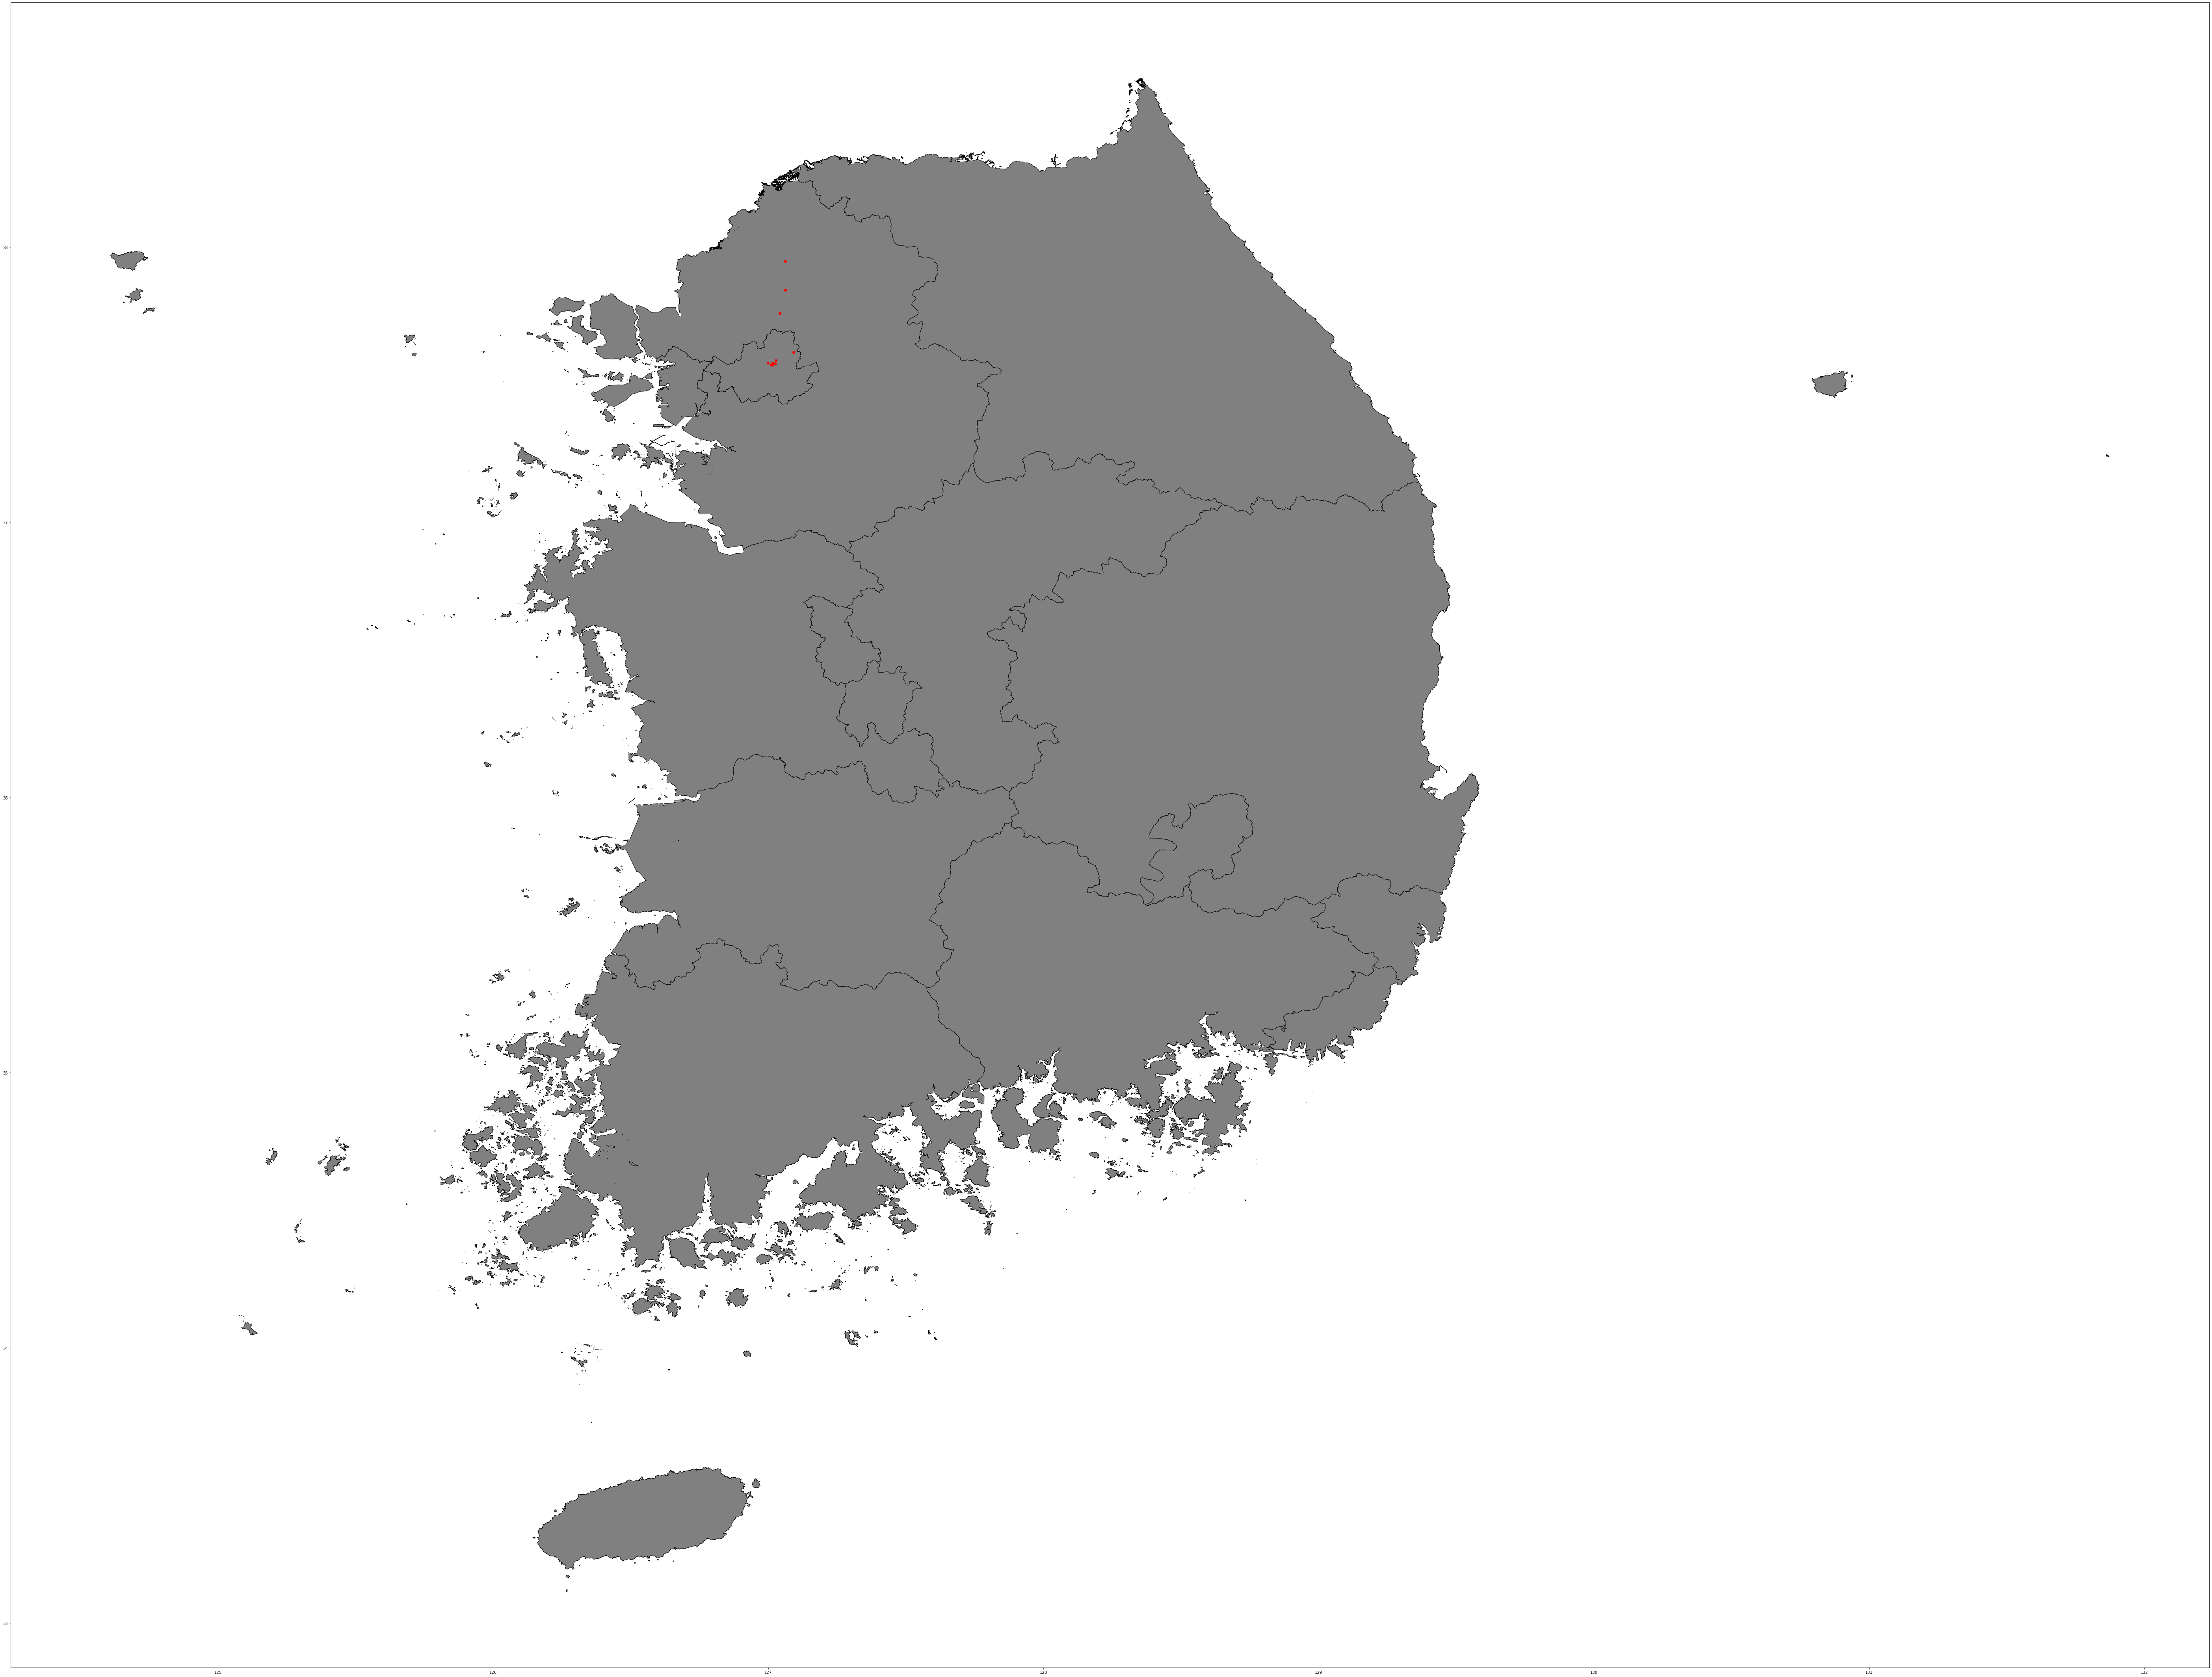

In [136]:
base = korea.plot(color = 'grey', edgecolor= 'black',figsize=(100,80))
inssa_geo.plot(ax=base,marker='o',color='red')

서울, 경기만 확대시켜보자

In [148]:
activ = korea[korea["CTP_ENG_NM"].isin(["Seoul","Gyeonggi-do"])]

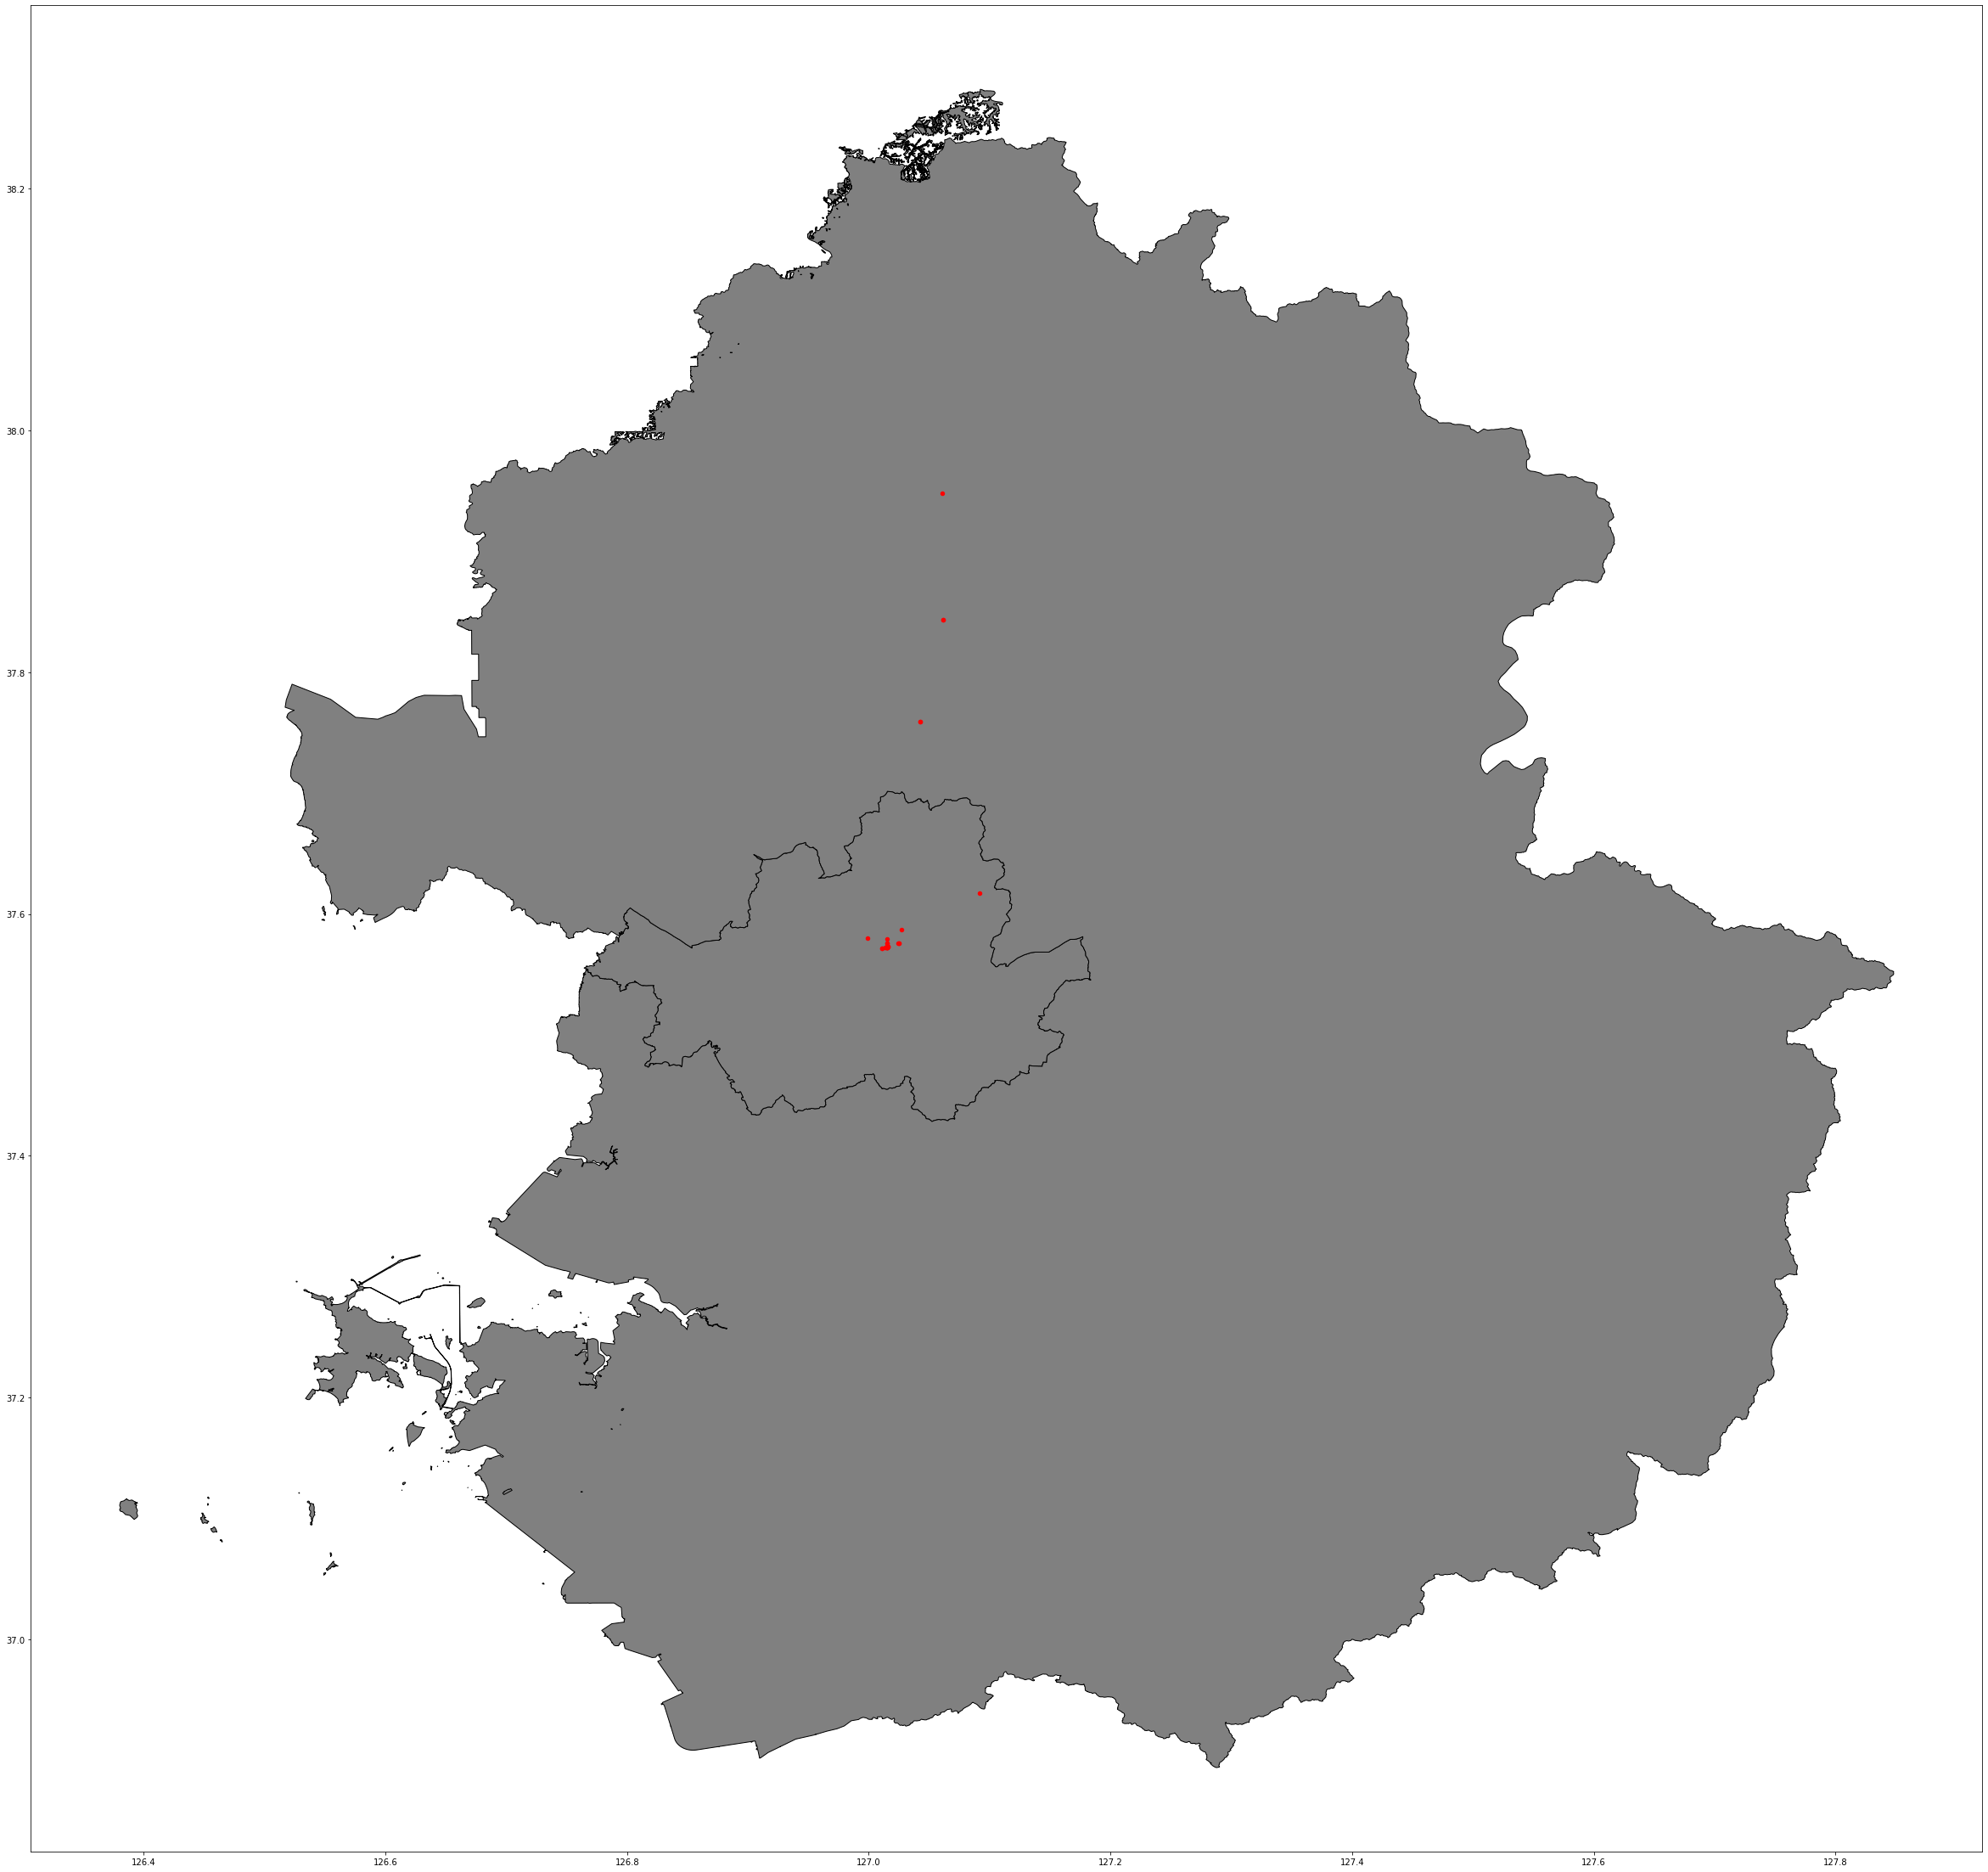

In [154]:
base_a = activ.plot(color = 'grey', edgecolor= 'black',figsize=(50,40))
inssa_geo.plot(ax=base_a,marker='o',markersize = 20, color='red')